In [18]:
import cobra
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cobra.io import read_sbml_model

In [11]:
iMAT_quant = pd.read_csv("/home/mickael/github/M_xanthus-E_coli-Predation/results/quantiles/iMAT/log2FoldChange/epsilon_1.0_quantiles_40_70.tsv", sep = "\t")
iMAT_quant

,reaction_id,flux_value,classification,y_f,y_r
0,rxn02201_c,0.0,moderate,NaN,NaN
1,rxn00351_c,1.0,high,1.0,0.0
2,rxn07431_c,0.0,low,1.0,0.0
3,rxn00836_c,0.0,moderate,NaN,NaN
4,rxn01094_c,0.0,low,1.0,0.0
...,...,...,...,...,...
1362,EX_lac_D_e,255.0,NaN,NaN,NaN
1363,EX_tsul_e,0.0,NaN,NaN,NaN
1364,DM_glycogenb_c,0.0,NaN,NaN,NaN
1365,DM_Biomass_c,0.0,NaN,NaN,NaN


In [14]:
iMAT_mean = pd.read_csv("/home/mickael/github/M_xanthus-E_coli-Predation/results/iMat/reactionData_classification.tsv", sep = "\t")
iMAT_mean

,reaction_id,flux,classification,y_f,y_r
0,rxn02201_c,0.000000,moderate,NaN,NaN
1,rxn00351_c,1.000000,high,1.0,0.0
2,rxn07431_c,0.000000,low,1.0,0.0
3,rxn00836_c,-0.890884,moderate,NaN,NaN
4,rxn01094_c,0.000000,low,1.0,0.0
...,...,...,...,...,...
1362,EX_lac_D_e,999.000000,NaN,NaN,NaN
1363,EX_tsul_e,0.000000,NaN,NaN,NaN
1364,DM_glycogenb_c,0.000000,NaN,NaN,NaN
1365,DM_Biomass_c,97.999376,NaN,NaN,NaN


2.35714285091441


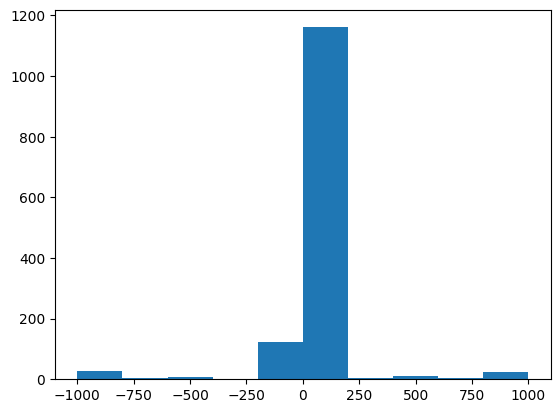

In [ ]:
plt.hist(iMAT_mean.flux)

(array([  12.,    2.,    5.,    4.,   42., 1272.,    5.,    9.,    6.,
          10.]),
 array([-1000.,  -800.,  -600.,  -400.,  -200.,     0.,   200.,   400.,
          600.,   800.,  1000.]),
 <BarContainer object of 10 artists>)

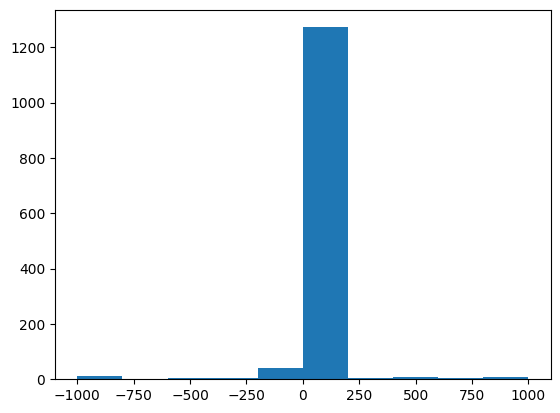

In [21]:
plt.hist(iMAT_quant.flux_value)

**Dynamic component of environment**

Choose the metabolites wanted in environment and their quantities.

In [2]:
# for now need to put the exact name of metabolite (even sometime didn't work like O2)
## else if put only Glucose give all stuff with glucose (find a way to filter more / choose between)
Metabolites = {"Glucose": 100, "Ammonium": 10, "O2": 1000}

for i in Metabolites:
    print(i)

Glucose
Ammonium
O2


**For M.xanthus**

In [3]:
M_xanthus = read_sbml_model("../M_xanthus_model_V2.sbml")
M_xanthus

Name,myxo_model
Memory address,7a29e527d970
Number of metabolites,1280
Number of reactions,1367
Number of genes,1192
Number of groups,0
Objective expression,1.0*OF_BIOMASS - 1.0*OF_BIOMASS_reverse_80d2e
Compartments,"c, e"


In [4]:
# convert 'glucose' to 'glc_e'
## Problem need to have right name (ex: here in M_xanthus Ammonium = nothing)
Metabolites_id = {}
for i in M_xanthus.metabolites:
    for j in Metabolites:
        if j in i.name:
            Metabolites_id[i.id] = j
            print(i.name)

print(Metabolites_id)

CO2 [c]
O2 [c]
H2O2 [c]
D-Glucose [c]
Glucose-1-phosphate [c]
beta-D-Glucose [c]
O2- [c]
beta-D-Glucose 1-phosphate [c]
beta-D-Glucose 6-phosphate [c]
Lauroyl-KDO2-lipid IV(A) [c]
D-Glucose [e]
alpha-D-Glucose [c]
alpha-D-Glucose 6-phosphate [c]
O2 [e]
CO2 [e]
{'co2_c': 'O2', 'o2_c': 'O2', 'h2o2_c': 'O2', 'glc_D_c': 'Glucose', 'g1p_c': 'Glucose', 'glc_D_B_c': 'Glucose', 'o2s_c': 'O2', 'g1p_B_c': 'Glucose', 'g6p_B_c': 'Glucose', 'kdo2lipid4L_c': 'O2', 'glc_D_e': 'Glucose', 'alpha_D_Glucose_c': 'Glucose', 'ag6p_c': 'Glucose', 'o2_e': 'O2', 'co2_e': 'O2'}


In [5]:
# get the id of exchange reaction of the metabolites
## Problem mutliple exchange of ex:'O2'
reaction_id_temp = {}

for i in M_xanthus.exchanges._dict:
    for j in Metabolites_id:
        if j in M_xanthus.reactions.get_by_id(i).reaction and i not in reaction_id_temp:
            reaction_id_temp[i] = Metabolites_id[j]

print(reaction_id_temp)

{'EX_co2_e': 'O2', 'EX_glc_D_e': 'Glucose', 'EX_o2_e': 'O2'}


In [6]:
FBA1 = M_xanthus.optimize()
reaction_id = {}

for i in reaction_id_temp:
    if FBA1[i] < 0:
        print(i + ": yes")
        reaction_id[i] = Metabolites[reaction_id_temp[i]]
print(reaction_id)

EX_o2_e: yes
{'EX_o2_e': 1000}


**For E.coli**

In [7]:
E_coli = read_sbml_model("../E_coli_model.sbml")
E_coli

Name,iML1515
Memory address,7a29e490b800
Number of metabolites,1877
Number of reactions,2714
Number of genes,1516
Number of groups,0
Objective expression,1.0*BIOMASS_Ec_iML1515_core_75p37M - 1.0*BIOMASS_Ec_iML1515_core_75p37M_reverse_35685
Compartments,"cytosol, extracellular space, periplasm"


In [8]:
# convert 'glucose' to 'glc_e'
## Problem mutliple exchange of glucose
Metabolites_id = {}
for i in E_coli.metabolites:
    for j in Metabolites:
        if j in i.name:
            Metabolites_id[i.id] = j
            print(i.name)

print(Metabolites_id)

CO2 CO2
D-Glucose 1-phosphate
D-Glucose 6-phosphate
Thymine C5H6N2O2
D-Glucose 6-phosphate
O2 O2
Ammonium
Thymine C5H6N2O2
Ammonium
D-Glucose
D-Glucose 1-phosphate
Thymine C5H6N2O2
O2 O2
D-Glucose 1-phosphate
CO2 CO2
D-Glucose
Ammonium
O2 O2
D-Glucose 6-phosphate
D-Glucose
Sarcosine C3H7NO2
CO2 CO2
{'co2_e': 'O2', 'g1p_e': 'Glucose', 'g6p_e': 'Glucose', 'thym_p': 'O2', 'g6p_p': 'Glucose', 'o2_c': 'O2', 'nh4_c': 'Ammonium', 'thym_c': 'O2', 'nh4_p': 'Ammonium', 'glc__D_c': 'Glucose', 'g1p_p': 'Glucose', 'thym_e': 'O2', 'o2_p': 'O2', 'g1p_c': 'Glucose', 'co2_p': 'O2', 'glc__D_e': 'Glucose', 'nh4_e': 'Ammonium', 'o2_e': 'O2', 'g6p_c': 'Glucose', 'glc__D_p': 'Glucose', 'sarcs_c': 'O2', 'co2_c': 'O2'}


In [9]:
# get the id of exchange reaction of the metabolites
## Problem mutliple exchange of glucose
reaction_id_temp = {}

for i in E_coli.exchanges._dict:
    for j in Metabolites_id:
        if j in E_coli.reactions.get_by_id(i).reaction and i not in reaction_id_temp:
            reaction_id_temp[i] = Metabolites_id[j]

print(reaction_id_temp)

{'EX_co2_e': 'O2', 'EX_thym_e': 'O2', 'EX_glc__D_e': 'Glucose', 'EX_g6p_e': 'Glucose', 'EX_h2o2_e': 'O2', 'EX_no2_e': 'O2', 'EX_nh4_e': 'Ammonium', 'EX_so2_e': 'O2', 'EX_g1p_e': 'Glucose', 'EX_o2_e': 'O2'}


In [10]:
FBA1 = E_coli.optimize()
reaction_id = {}

for i in reaction_id_temp:
    if FBA1[i] < 0:
        print(i + ": yes")
        reaction_id[i] = Metabolites[reaction_id_temp[i]]
print(reaction_id)

EX_glc__D_e: yes
EX_nh4_e: yes
EX_o2_e: yes
{'EX_glc__D_e': 100, 'EX_nh4_e': 10, 'EX_o2_e': 1000}
